# Assignment 3

## Integrating a Ball of Test Particles

In this assignment, we're going to try to visualize with some plots what we worked out in Assignment 2. If you recall from that assignment, we figured out how particles on different sides of the satellite would be orbit differently around the host galaxy. The stars outside the tidal radius get stripped and start to form a stream.

To try to implement this process, we are going to use a set of *test particles* to describe stars. Test particles are particles to which we assign no mass. This means that although they are being accelerated by the gravitational potential of the host galaxy, they do not accelerate the galaxy in return. They are used because they are good approximation in this case, given that the mass of an individual star is $\approx 10^{12}$ times less than the mass of the galaxy.

Note that this does mean the tidal radius is no longer a quantity with physical meaning since it relies on the satellite having mass and interacting with the particles that populate it. We will be able to get around this problem when we use Gala, but for now, the following exercise is still a useful one to perform since it does help to visualize the formation of a stream.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's make our test particles have a distribution resembling a Gaussian ball. This just specifies how we want to distribute all our particles in space. In essence we will put more particles in the center than on the outskirts, which is the case for a real satellite. If you would like to learn more about Gaussian distributions more generally, there are tons of resources but here is one that has examples in python: https://vitalflux.com/normal-distribution-explained-python-examples/


In [2]:
n_stars = 1000

# tell numpy to arange my 1000 particles to have a mean x-position of 30 with a standard deviation of 0.2
x_part = np.random.normal(30, 0.2, size = n_stars) 

# tell numpy to arange my 1000 particles to have a mean y-position of 0 with a standard deviation of 0.2
y_part = np.random.normal(0, 0.2, size = n_stars)

Make a couple of plots to visualize this distribution of stars. Notice the difference in the axes limits in the bottom two plots.

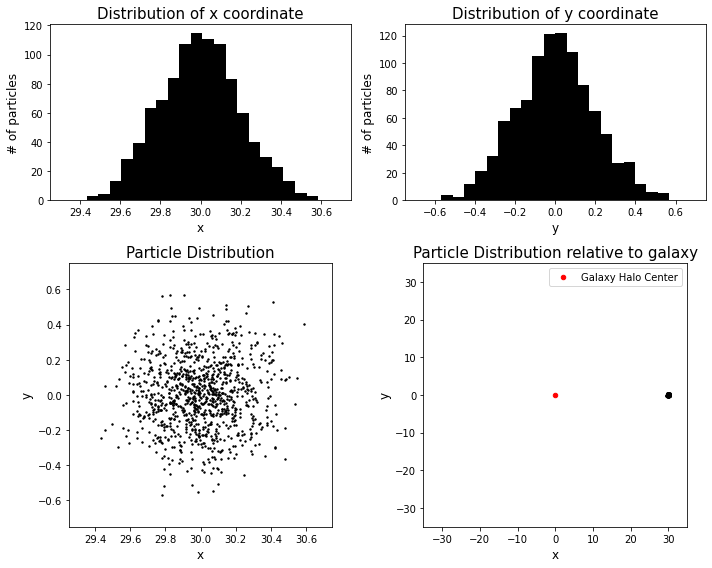

In [3]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, figsize = (10, 8), gridspec_kw={'height_ratios': [1, 1.5]})

ax1.hist(x_part, bins = 20, color='k')
ax1.set_xlabel(r'x', fontsize = 12)
ax1.set_ylabel(r'# of particles', fontsize = 12)
ax1.set_xlim(29.25, 30.75)
ax1.set_title(r'Distribution of x coordinate', fontsize = 15)

ax2.hist(y_part, bins = 20, color='k')
ax2.set_xlabel(r'y', fontsize = 12)
ax2.set_ylabel(r'# of particles', fontsize = 12)
ax2.set_xlim(-0.75, 0.75)
ax2.set_title(r'Distribution of y coordinate', fontsize = 15)

ax3.scatter(x_part, y_part, c = 'k', s = 2)
ax3.set_xlabel(r'x', fontsize = 12)
ax3.set_ylabel(r'y', fontsize = 12)
ax3.set_xlim(29.25, 30.75)
ax3.set_ylim(-0.75, 0.75)
ax3.set_title(r'Particle Distribution', fontsize = 15)
ax3.set_aspect('equal')

ax4.scatter(x_part, y_part, c = 'k', s = 1)
ax4.scatter(0,0, c='r', s = 20, label='Galaxy Halo Center')
ax4.set_xlabel(r'x', fontsize = 12)
ax4.set_ylabel(r'y', fontsize = 12)
ax4.set_xlim(-35, 35)
ax4.set_ylim(-35, 35)
ax4.set_title(r'Particle Distribution relative to galaxy', fontsize = 15)
ax4.set_aspect('equal')
ax4.legend()

fig.tight_layout()
plt.show()

### Setup Code

Since we will be integrating orbits, copy your functions for the Hernquist potential from the previous assignments that are relevant for doing so.

In [4]:
# copy your previous code here

'''SOLUTION:'''

def hern_potential(M, x, y, G, c):
    """
    Parameters
    ----------
    mass : float
        mass of central body
    x : array
        x-postions
    y : array
        y-postions
    G : float
        Gravitational Constant  
        
    Returns
    ----------
    ax : array
    Potential value 
    """
    r = np.sqrt(x**2 + y**2)
    return (-G*M)/(r+c)

# Calculate acceleration given position coordinates
def hern_accel(M, x, y, G, c):
    """
    Parameters
    ----------
    mass : float
        mass of central body
    x : array
        x-postions
    y : array
        y-postions
    G : float
        Gravitational Constant  
        
    Returns
    ----------
    ax : array
        x-accelerations 
    ay : array
        y-accelerations 
    """
    
    # Little trick here -- the following line give you the Cartesian accelerations for 
    # any spherical potential
    # Just replace dr with the derivative of the potential with respect to r (dPhi/dr)
    r = np.sqrt(x**2 + y**2)
    dr = (G*M)/(r+c)**2 # Derivative of potential
    ax = -dr * (x/r)
    ay = -dr * (y/r)
    
    return ax, ay

# Calculate circular velocity in Keplerian Potential given position coordinates
def circular_velocity(M, x, y, G, c):
    """
    Parameters
    ----------
    mass : float
        mass of central body
    x : array
        x-postions
    y : array
        y-postions
    G : float
        Gravitational Constant  
        
    Returns
    ----------
    vc : array
        circular velocity
    """
    r = np.sqrt(x**2 + y**2)
    return np.sqrt((G*M*r) / (r+c)**2)

# Calculate period of circular orbit in Keplerian potential given position coordinates
def time_period(M, x, y, G, c):
    """
    Parameters
    ----------
    mass : float
        mass of central body
    x : array
        x-postions
    y : array
        y-postions
    G : float
        Gravitational Constant  
        
    Returns
    ----------
    vc : array
        time period of a circular orbit
    """
    r = np.sqrt(x**2 + y**2)
    vcirc = circular_velocity(M, x, y, G, c)
    return (2*np.pi*r) / vcirc

### Exercise 1:

Assume that the host galaxy has mass $10^{12}$, scale radius 15, and has a Hernquist profile. What is the circular velocity of each of these stars? Make a scatter plot of the stars as in the bottom left plot above and color the points by their circular velocity with a color bar. Check the advanced techniques part of the Plotting Tutorial notebook if you aren't sure how to do this. Do you notice anything?

In [5]:
G = 6.67e-11
# your code here

'''SOLUTION'''
#Define the constants
M = 1e12; c = 15;

#calculate the circular velocity given the initial x and y positions
# Python can do this all at once if x_part and y_part are the same length
v_circ = circular_velocity(M, x_part, y_part, G, c) 

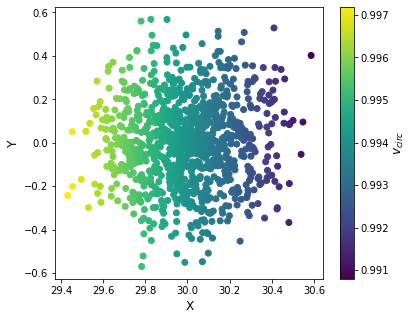

In [6]:
'''Solution'''
plt.figure(figsize=(6,5))
plt.scatter(x_part, y_part, c=v_circ)
plt.xlabel(r'X', fontsize = 12)
plt.ylabel(r'Y', fontsize = 12)
cb = plt.colorbar(label=r'$v_{circ}$') # you can also use the code for a colorbar from the plotting tutorial
cb.set_label(label=r'$v_{circ}$',fontsize=12)
plt.show()

**SOLUTION:**

I notice that the stars closer to the center of the galaxy have a higher circular velocity, relative to the stars farther away. This makes me think that these stars will form the leading tail of the stream while the outer stars will form the trailing tail. 

*Note:* For a longer explanation of circular velocity in a Hernquist potential, see the end of the Assignment 2 Solutions

### Exercise 2:

Integrate the orbits of each of these stars in a Hernquist potential with scale radius 3. Initialize the conditions such that each star is on a circular orbit. Make sure you integrate them long enough for the stars to go around the galaxy $\sim 10$ times. You may want to use problem 2 in Assignment 2 as a guide to figure out what that time is.

Plot the distribution of stars at the end of the integration in a scatter plot side by side with the initial distribution.

**Coding note:** This is a non-trivial probelm to code because you have to keep track of all the particles at every timestep. You can either write some loops and figure out a way to save them (this will be much slower)
or you can apply the Leapfrog integrator to all the particles at once. To do this, you should make a matrix for each position, velocity, and acceleration component, as well as one for the energy. Here is an example for the $x$-position matrix:
$$
\begin{equation*}
\Biggl(
\begin{matrix}
x_{0,0} & x_{0,1} & \cdots & x_{0,T} \\
x_{1,0} & x_{1,1} & \cdots & x_{1,T} \\
\vdots  & \vdots  & \ddots & \vdots  \\
x_{N,0} & x_{N,1} & \cdots & x_{N,T} \\
\end{matrix}
\Biggr)
\end{equation*}
$$
where $x_{i,j}$ is the $x$-position of the $i$-th particle at the $j$-th timestep. $T$ is the total number of timesteps and $N$ is the total number of particles.

In words, each row in your matrix should correspond to the arrays you built in the leapfrog integrator notebook (in other words, each row represents one particle). Each column represents one time of integration (in other words, if you select the first column, you should get the initial position/velocity/acceleration/energy of every particle and if you select the last column,  you should get the final position/velocity/acceleration/energy of every particle). As in the leapfrog integrator notebook, you should start with a matrix of zeros, and fill it in as you integrate the orbit in the for loop.

I've given an example of the starting point for the x-position below. 

*Note:* If you've never coded something like this before, this is likely going to be challenging to figure out. Do not worry if it is taking you a while. We encourage you to use each other as resources on this before you reach out to the mentors for advice.

In [7]:
# Here is an example of the setup for the x position:
# Note: this bit of code should come after you define t as in the leapfrog integrator notebook
'''
n_part = len(x_part) # the number of particles
x = np.zeros((n_part, len(t))) 
x[:, 0] = x_part
'''

'\nn_part = len(x_part) # the number of particles\nx = np.zeros((n_part, len(t))) \nx[:, 0] = x_part\n'

### Solution

We are going to split this up into lots of steps and code cells. First, let's save the number of particles as a variable. We can do this by taking the length of the array of all x-positions:

In [8]:
n_part = len(x_part) # the number of particles based on the length of the array of all x-positions

Now we need to define the initial conditions for our particles.
We will need to do this for the x and y positions, velocities and accelerations.
We already have the initial conditions for the positions:

In [9]:
x_0, y_0 = x_part, y_part # redefine them so that the syntax matches the Leapfrog Tutorial

and for our velocities *(almost).* We have to make an adjustment.
To get our vx_0 and vy_0 we need to convert our circular velocities to the velocities in the x and y directions. 
This mean multiplying by sin(theta) for the y-velocity and cos(theta) for the x-velocity. But instead of using sin and cos, which requires us to figure out the angle, we can use the fractions that give us sin and cos directly (from a right triangle). To do this, we will need the radius of each particle, defined by $r^2 = x^2 + y^2$:

In [10]:
r_part = np.sqrt(x_part**2 + y_part**2)
vx_0 = v_circ * (y_part/r_part)
vy_0 = v_circ * (x_part/r_part)

Finally, we define the initial accelerations in the x and y directions from our Hernquist accelerations function:

In [11]:
ax_0, ay_0 = hern_accel(M, x_part, y_part,  G, c)

Now we focus on the timesteps and the various variables used to describe them. This follows a similar pattern to our one-particle case. 

But I mentioned that we want to integrate for 10 orbits. To do that, one way is to take the average period of the stars and multiply by 10. This will give the number of "years". We then need to remember to divide by dt (or equivalently, multiply by the # of timesteps in one "year", given by 1/dt).
I do this in the cell below along with other time-related things from the one-particle case:

In [12]:
dt = 0.1 # size of the steps in time

N = 10 * np.mean(time_period(M, x_part, y_part, G, c)) / dt # number of steps in orbit integration

t = np.arange(0,N*dt,dt) # time interval over which we are integrating the orbit

We now come to the matrix part of the code. We first need to create matrices of zeros that we will fill in, just as we did for the arrays of zeros in the one particle case. We'll follow the guide from the x-particle matrix in the example above.

In [14]:
x = np.zeros((n_part, len(t))) #* u.AU
y = np.zeros((n_part, len(t))) #* u.AU

vx = np.zeros((n_part, len(t))) #* u.m / u.s
vy = np.zeros((n_part, len(t))) #* u.m / u.s

ax = np.zeros((n_part, len(t))) #* u.m / u.s**2
ay = np.zeros((n_part, len(t))) #* u.m / u.s**2

E = np.zeros((n_part, len(t))) #* u.m**2 / u.s**2

Again, as in the example above, let's set the first column in each of our matrices equal to the initial conditions:

In [15]:
x[:, 0] = x_0
y[:, 0] = y_0

vx[:, 0] = vx_0
vy[:, 0] = vy_0

ax[:, 0] = ax_0
ay[:, 0] = ay_0

E[:, 0] = 0.5*(vx_0**2 + vy_0**2) + hern_potential(M, x_0, y_0,  G, c) # total energy of the system

Now we need to run our for loop from before. They key is that whereas before we were filling in one value at a time, we are now filling in one *column* at a time, for all the particles at once. We will make use of the same colons (:) that helped us define the entire first columns at once in the matrices above. *Otherwise, the code is exactly the same as before!*

*Note:* This part will take ~10 seconds to run. This is because we are doing a lot of integration on a lot of particles and that is a lot of computations for even our computer to do!

In [16]:
for i in range(len(t)-1):
    ax[:, i], ay[:, i] = hern_accel(M, x[:, i], y[:, i], G, c) # Find new acceleration
    
    vx_plushalf = vx[:, i] + ax[:, i]*dt*(1/2) # Find new velocity given accleration from potential (kick!)
    x[:, i+1] = x[:, i] + vx_plushalf*dt # Find new position given previous particle vel and accel (drift!)

    vy_plushalf = vy[:, i] + ay[:, i]*dt*(1/2)
    y[:, i+1] = y[:, i] + vy_plushalf*dt # Find new position given previous particle velocity and acceleration
    
    ax[:, i+1], ay[:, i+1] = hern_accel(M, x[:, i+1], y[:, i+1], G, c) # Find new acceleration
        
    vx[:, i+1] = vx_plushalf + ax[:, i+1]*dt*(1/2) # Find new velocity given new acceleration (kick!)
    vy[:, i+1] = vy_plushalf + ay[:, i+1]*dt*(1/2) # Find new velocity given new acceleration (kick!)
    
    E[:, i+1] = 0.5*(vx[:,i+1]**2 + vy[:,i+1]**2) + hern_potential(M, x[:,i+1], y[:,i+1],  G, c)

**And we are done!** We've successfully integrated the orbits of all the stars in the ball. Now let's look at some plots:

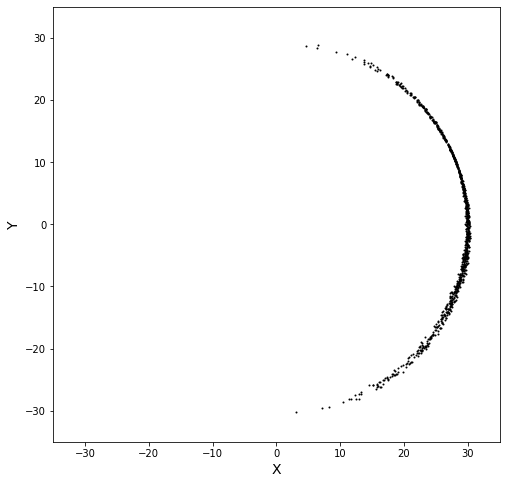

In [17]:
# positions of all the particles
plt.figure(figsize = (8,8))
plt.scatter(x[:,-1], y[:,-1], s = 1, c = 'k')
plt.xlim(-35, 35)
plt.ylim(-35, 35)
plt.xlabel('X', fontsize = 14)
plt.ylabel('Y', fontsize = 14)
plt.show()

Looks like a stream to me!

### Exercise 3:

Plot the final distribution of stars again, but this time color the points by their energy. Recall from Assignment 2 that $$E = \frac{1}{2} v_{circ}^2 + \Phi(R)$$ where $\Phi$ represents the Hernquist potential.

Also color the final distribution of stars by their time period. Use your code/formulas from Assignment 2 to get the periods.

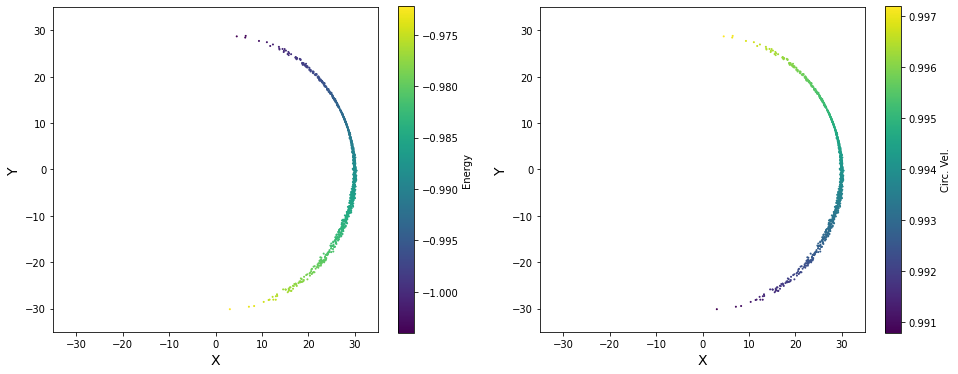

In [18]:
# your code here

'''SOLUTION'''
T = time_period(M, x_part, y_part, G, c)
vcirc = circular_velocity(M, x_part, y_part, G, c)

fig, [ax1, ax2] = plt.subplots(1,2,figsize = (16,6))
im1 = ax1.scatter(x[:,-1], y[:,-1], c = E[:,-1], s = 1)
ax1.set_aspect('equal')
ax1.set_xlim(-35, 35)
ax1.set_ylim(-35, 35)
ax1.set_xlabel('X', fontsize = 14)
ax1.set_ylabel('Y', fontsize = 14)
fig.colorbar(im1, ax=ax1, label='Energy')

im2 = ax2.scatter(x[:,-1], y[:,-1], c = vcirc, s = 1)
ax2.set_aspect('equal')
ax2.set_xlim(-35, 35)
ax2.set_ylim(-35, 35)
ax2.set_xlabel('X', fontsize = 14)
ax2.set_ylabel('Y', fontsize = 14)
fig.colorbar(im2, ax=ax2, label='Circ. Vel.')

plt.show()

Refer back to your answer to Problem 3 in Assignment 2. How does the length of your integrated stream here compare to the length you predicted? What are the differences in the two setups that would lead to any changes?

Also - explain in your own words why, given their orbital properties, certain particles are "leading" and others are "trailing". And how does this help you understand formation of streams

**SOLUTION**:

In the right plot, we see that the trailing tail is moving slower than the leading tail. This makes sense because it explains why it is "behind". We also saw from Exercise 1 that these stars are farther from the center of the galaxy that the stars in the leading tail, although that is hard to tell from this plot.

In the left plot we see that the stars in the leading tail have a lower energy (although importantly, the absolute value of their energy is higher). We've already seen that those stars will be closer in to the center which means the potential will be more negative. We also know that because they are moving faster, the kinetic energy should be higher. This implies that the difference in the potential energy in the leading tail vs the trailing tail is more significant that the difference in the kinetic energy, which leads to the trend that we see. (Note that this will not necessarily always be true for all initial conditions.)

### Exercise 4:

Go back and vary the initial conditions of the ball of particles. Note that in this case, this means the mean position of the ball and possibly the standard deviation defining how the ball is distributed around that mean. Observe how things change. Could you set up this code so that you can match the length of the integrated stream to what you predicted in Assignment 2?

One specific initial condition you could try is to use the same masses as one of the configurations in Assignment 2 and make the standard deviation the same as the tidal radius from Assignment 2.

**SOLUTION:**

No solution for this one since it is pretty open ended. Hope you were able to try different configurations and observe how things may change.

## Making a Movie

Here is some code that will make a movie of the particles spreading out. You are welcome to try to implement this on your own, but it is not worth spending too much time on, so we are providing the code for you.

In [26]:
# you may need to change some variable names: x is the matrix of x-positions, y is the matrix of y-positions,
#                                             dt is the timestep

from matplotlib.animation import FuncAnimation

def animate(i) :
    ax1.clear()
    
    ax1.scatter(x[:,i],y[:,i], c='k', s=2)
    ax1.set_xlim(-35, 35)
    ax1.set_ylim(-35, 35)
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')
    
    plt.suptitle(r'Time = {}'.format(np.around(i*dt, 1)))
    plt.tight_layout()
    plt.draw()

<IPython.core.display.Javascript object>


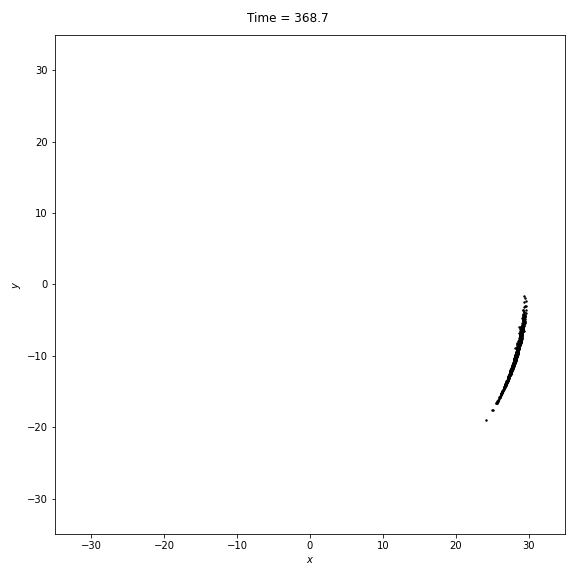

In [27]:
# You may need to change N, it should be the total number of steps in your orbit integration
%matplotlib notebook
fig, ax1 = plt.subplots(1, 1, figsize=(8,8))
anim = FuncAnimation(fig, animate, frames = int(N), #N should be the number of steps in your orbit integration
                              interval = 1, blit = True) #interval is the display animation speed

## Extra Stuff:

If you are interested and have extra time, you could try one of the following:

1. Implement what we've done so far in three dimensions instead of two. You will need to add some modifications to nearly everything we've done so far, starting with defining the potentials to include a z-coordinate. To plot, you can either plot in 3d or plot in multiple combinations of two coordinates (e.g. x-y, y-z, x-z)

2. Start taking a look at the Gala website (http://gala.adrian.pw/en/latest/). You should be able to understand what is in the documentation better now that you have built some of that code yourself!